In [1]:
from models.clip import CLIPModel
from data.__init__ import load_dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

/home/rzhang139/anaconda3/envs/ldm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/rzhang139/anaconda3/envs/ldm/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:

# load MNIST
data = load_dataset("mnist")
# extract single random image from MNIST, note this is PIL format
im = data[0][0] # data['train']['image'][0]

# convert to a (1,28,28) tensor
# For Images
preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    # convert greyscale to RGB
    transforms.Lambda(lambda img: img.convert('RGB')),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711]),
])

im = preprocess(im).cuda().unsqueeze(0)
print(im.shape)


# text prompt
text = "an image of a 5"

model = CLIPModel()
model.alignment(im, text)

Is CUDA enabled? False
hi
h


RuntimeError: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


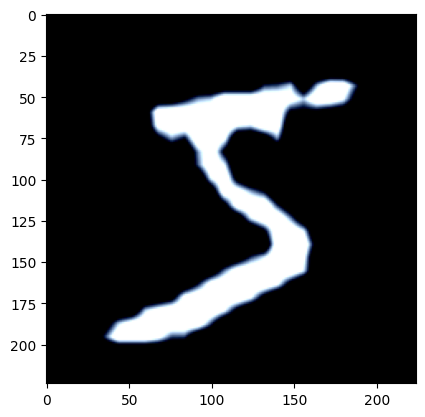

In [ ]:
# display im
plt.imshow(im.squeeze().cpu().numpy().transpose(1,2,0))

In [ ]:
from data import multimnist

In [ ]:
sample_data = multimnist.generate()
image_final, text_final = sample_data

A 2, to the right of a 8


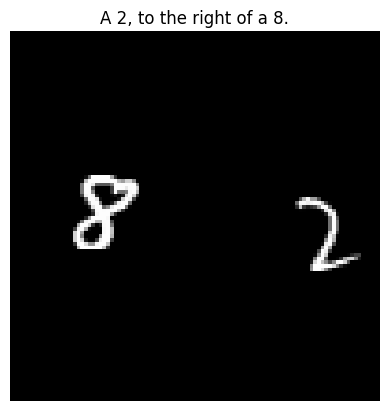

In [ ]:
image_to_show = image_final.squeeze(0).permute(1, 2, 0).detach().numpy()

plt.imshow(image_to_show)
plt.title(text_final)
plt.axis('off')
plt.show()

In [ ]:
sample_data1 = multimnist.generate()
image_final1, text_final1 = sample_data1

A 0, below a 6
A 0, below a 6, the 0 colored green


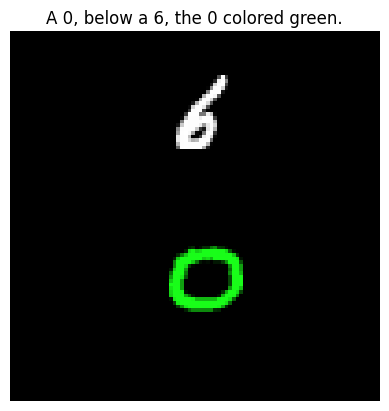

In [ ]:
image_to_show1 = image_final1.squeeze(0).permute(1, 2, 0).detach().numpy()

plt.imshow(image_to_show1)
plt.title(text_final1)
plt.axis('off')
plt.show()

Compare an image with all its controlled alterations (Color)

Color altered: A 0 colored plain.


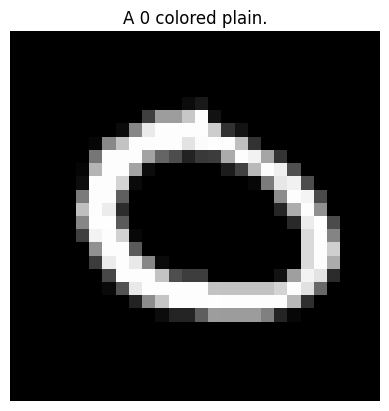

Color altered: A 0 colored red.


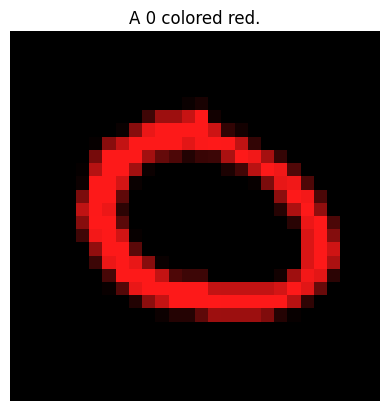

Color altered: A 0 colored green.


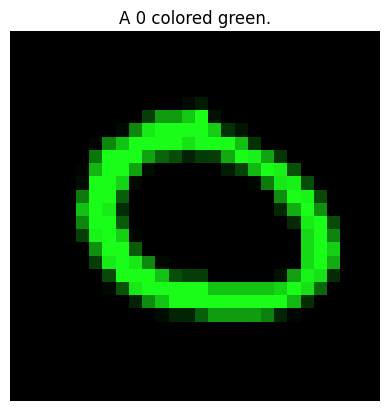

Color altered: A 0 colored blue.


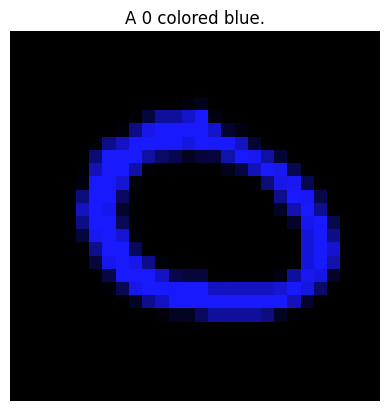

Color altered: A 0 colored yellow.


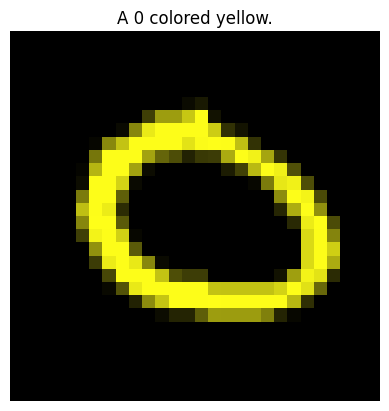

Color altered: A 0 colored purple.


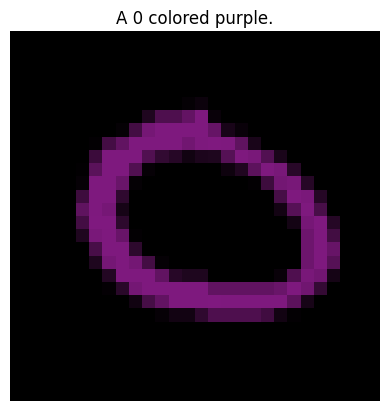

In [ ]:
# Compare an image with plain number with image with color changed!

images, text_descs = multimnist.generate_colored()
for img, desc in zip(images, text_descs):
    print(f"Color altered: {desc}")
    img = img.squeeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(img)
    plt.title(desc)
    plt.axis('off')
    plt.show()

In [ ]:
# Finding alignment between controlled alterations

image_tmp = images[1]
text_tmp = text_descs[0]

preprocess = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    # convert greyscale to RGB
    transforms.Lambda(lambda img: img.convert('RGB')),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711]),
])

image_np = image_tmp.squeeze(0).permute(1, 2, 0).cpu().numpy()
image_pil = Image.fromarray((image_np * 255).astype('uint8'))
im = preprocess(image_pil).cuda().unsqueeze(0)

print(text_tmp)

model = CLIPModel()
model.alignment(im, text_tmp)

A 0 colored plain.


0.22802734375

In [ ]:
# convert to a (1,28,28) tensor
# For Images
print(image_final.shape)
preprocess = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    # convert greyscale to RGB
    transforms.Lambda(lambda img: img.convert('RGB')),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], std=[0.26862954, 0.26130258, 0.27577711]),
])
# from PIL import Image
# image_final = Image.fromarray(image_final)
# import torchvision.transforms.functional as F
# image_final = F.to_pil_image(image_final)
print(type(image_final))
image_np = image_final.squeeze(0).permute(1, 2, 0).cpu().numpy()

# Convert to PIL Image
image_pil = Image.fromarray((image_np * 255).astype('uint8'))

im = preprocess(image_pil).cuda().unsqueeze(0)
print(im.shape)


# text prompt
# text = "an image of a 5"

model = CLIPModel()
model.alignment(im, text_final)

torch.Size([1, 3, 100, 100])
<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])


0.246337890625

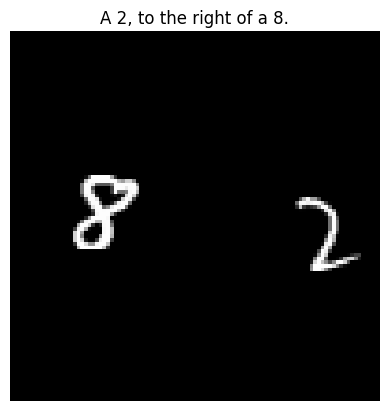

In [ ]:
# im = im.squeeze(0).permute(1, 2, 0).detach().numpy()
plt.imshow(image_np)
plt.title(text_final)
plt.axis('off')
plt.show()